In [6]:
! pip install -q kaggle

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"avkrylovv","key":"052e90e6d6225e0650f1e999540f4ec8"}'}

In [7]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [8]:
! kaggle datasets download -d iabhishekofficial/mobile-price-classification

100% 70.6k/70.6k [00:00<00:00, 323kB/s]
100% 70.6k/70.6k [00:00<00:00, 322kB/s]


In [9]:
from IPython.core.display import clear_output
!unzip '/content/mobile-price-classification.zip' -d '/content/mobile-price-classification'
clear_output()

In [28]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [29]:
datadir='/content/mobile-price-classification'
train = pd.read_csv(datadir + "/train.csv")
test_data = pd.read_csv(datadir + "/test.csv")

In [30]:
train.head(30)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [32]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [33]:
X = train.drop(["price_range"], axis=1)
Y = train["price_range"]

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [35]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import Dataset, TensorDataset, DataLoader
import torchvision.transforms as T

In [36]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# To tensor

In [37]:
class MyDataset(Dataset):
  def __init__(self, data, targets, transform=None):
      self.data = torch.Tensor(np.array(data)).float()
      self.targets = torch.LongTensor(np.array(targets))
      self.transform = transform

  def __getitem__(self, index):
      x = self.data[index]
      y = self.targets[index]
      return x, y

  def __len__(self):
      return len(self.data)

In [38]:
train_dataset=MyDataset(X_train, Y_train)
test_dataset=MyDataset(X_test, Y_test)

In [129]:
batch_size=16 # размер пакета

In [130]:
train_loader = DataLoader(train_dataset, batch_size, shuffle=True) # загрузчики данных
val_loader = DataLoader(test_dataset, batch_size, shuffle=True)

In [131]:
dataloaders = {"train": train_loader,"validation": val_loader}

In [132]:
class mob_price_mod(nn.Module):
    def __init__(self):
        super(mob_price_mod, self).__init__()
        self.fc1 = nn.Linear(20, 512, bias=False)
        self.fc2 = nn.Linear(512, 1024, bias=False)
        self.fc3 = nn.Linear(1024, 512, bias=False)
        self.fc4 = nn.Linear(512, 4)
        self.activation = nn.LeakyReLU(inplace=True)
        self.bn1 = nn.BatchNorm1d(512)
        self.bn2 = nn.BatchNorm1d(1024)
        self.bn3 = nn.BatchNorm1d(512)

    def forward(self, x):
        # 1-й слой
        x=self.fc1(x)
        x=self.activation(x)
        x=self.bn1(x)
        # 2-й слой
        x=self.fc2(x)
        x=self.activation(x)
        x=self.bn2(x)
         # 3-й слой
        x=self.fc3(x)
        x=self.activation(x)
        x=self.bn3(x)
        # финальный слой
        x=self.fc4(x)
        return x

In [133]:
model=mob_price_mod()
model.to(device);

In [134]:
! pip install torchinfo

In [135]:
from torchinfo import summary
##summary(model,input_size=(1,20))

In [136]:
from tqdm import tqdm

In [137]:
criterion = nn.CrossEntropyLoss() # функция ошибки
optimizer=torch.optim.Adam(model.parameters()) # алгоритм оптимизации

In [138]:
train_losses=[]
train_acc=[]
def train(model, epoch, optimizer):
  print('\nEpoch : %d'%epoch)
  model.train() # веса модели можно обновлять
  running_loss=0
  correct=0
  for data in tqdm(train_loader):
      inputs, targets=data[0].to(device),data[1].to(device) # распаковываем пакеты
      optimizer.zero_grad() # обнуляем градиенты
      outputs=model(inputs) # считаем предсказания - прямой проход модели
      loss=criterion(outputs,targets) # ошибка пакета
      loss.backward() # обратное распространение ошибки
      optimizer.step() # итерация алгоритма оптимизации

      running_loss += loss.item()
      preds = torch.argmax(outputs, dim=1)
      correct += (preds == targets).float().sum()
  train_loss=running_loss/len(train_loader)
  train_losses.append(train_loss)
  accuracy = 100 * correct / len(train_dataset)
  train_acc.append(accuracy)
  print('Ошибка обучения в эпохе: %.4f'%(train_loss))
  print('Точность обучения в эпохе: %.4f:'%(accuracy))
  return train_loss, accuracy

In [139]:
val_losses=[]
val_acc=[]
def val(model,epoch):
    print('\nEpoch : %d'%epoch)
    model.eval() # веса модели заморожены
    running_loss=0
    correct=0
    with torch.no_grad(): # запрещаем переиспользывать градиенты
        for data in tqdm(val_loader):
            inputs, targets=data[0].to(device),data[1].to(device)
            outputs=model(inputs)
            loss=criterion(outputs,targets)
            running_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            correct += ( preds == targets).float().sum()
        val_loss=running_loss/len(val_loader)
        accuracy = 100 * correct / len(test_dataset)
        val_losses.append(val_loss)
        val_acc.append(accuracy)
        print('Ошибка валидации в эпохе: %.4f:'%(val_loss))
        print('Точность валидации в эпохе: %.4f:'%(accuracy))
        return val_loss, accuracy

In [140]:
num_epochs=90
for epoch in range(num_epochs):
      train(model, epoch,optimizer)
      val(model, epoch)


Epoch : 0


100%|██████████| 100/100 [00:00<00:00, 342.18it/s]


Ошибка обучения в эпохе: 0.6020
Точность обучения в эпохе: 74.5000:

Epoch : 0


100%|██████████| 25/25 [00:00<00:00, 1117.98it/s]


Ошибка валидации в эпохе: 0.2823:
Точность валидации в эпохе: 89.0000:

Epoch : 1


100%|██████████| 100/100 [00:00<00:00, 382.38it/s]


Ошибка обучения в эпохе: 0.6163
Точность обучения в эпохе: 75.7500:

Epoch : 1


100%|██████████| 25/25 [00:00<00:00, 1130.13it/s]


Ошибка валидации в эпохе: 0.3248:
Точность валидации в эпохе: 91.0000:

Epoch : 2


100%|██████████| 100/100 [00:00<00:00, 384.32it/s]


Ошибка обучения в эпохе: 0.5536
Точность обучения в эпохе: 76.5625:

Epoch : 2


100%|██████████| 25/25 [00:00<00:00, 607.61it/s]


Ошибка валидации в эпохе: 0.2372:
Точность валидации в эпохе: 92.5000:

Epoch : 3


100%|██████████| 100/100 [00:00<00:00, 270.20it/s]


Ошибка обучения в эпохе: 0.5016
Точность обучения в эпохе: 78.9375:

Epoch : 3


100%|██████████| 25/25 [00:00<00:00, 1134.83it/s]


Ошибка валидации в эпохе: 0.2775:
Точность валидации в эпохе: 88.7500:

Epoch : 4


100%|██████████| 100/100 [00:00<00:00, 378.93it/s]


Ошибка обучения в эпохе: 0.5362
Точность обучения в эпохе: 77.7500:

Epoch : 4


100%|██████████| 25/25 [00:00<00:00, 1152.41it/s]


Ошибка валидации в эпохе: 0.2380:
Точность валидации в эпохе: 92.0000:

Epoch : 5


100%|██████████| 100/100 [00:00<00:00, 395.63it/s]


Ошибка обучения в эпохе: 0.5267
Точность обучения в эпохе: 77.9375:

Epoch : 5


100%|██████████| 25/25 [00:00<00:00, 1125.11it/s]


Ошибка валидации в эпохе: 0.2546:
Точность валидации в эпохе: 91.2500:

Epoch : 6


100%|██████████| 100/100 [00:00<00:00, 406.44it/s]


Ошибка обучения в эпохе: 0.4790
Точность обучения в эпохе: 80.9375:

Epoch : 6


100%|██████████| 25/25 [00:00<00:00, 1103.39it/s]


Ошибка валидации в эпохе: 0.2436:
Точность валидации в эпохе: 91.5000:

Epoch : 7


100%|██████████| 100/100 [00:00<00:00, 409.22it/s]


Ошибка обучения в эпохе: 0.4641
Точность обучения в эпохе: 80.1250:

Epoch : 7


100%|██████████| 25/25 [00:00<00:00, 1007.57it/s]


Ошибка валидации в эпохе: 0.2531:
Точность валидации в эпохе: 94.2500:

Epoch : 8


100%|██████████| 100/100 [00:00<00:00, 385.42it/s]


Ошибка обучения в эпохе: 0.4713
Точность обучения в эпохе: 80.1250:

Epoch : 8


100%|██████████| 25/25 [00:00<00:00, 1159.11it/s]


Ошибка валидации в эпохе: 0.2953:
Точность валидации в эпохе: 88.0000:

Epoch : 9


100%|██████████| 100/100 [00:00<00:00, 374.86it/s]


Ошибка обучения в эпохе: 0.4582
Точность обучения в эпохе: 80.7500:

Epoch : 9


100%|██████████| 25/25 [00:00<00:00, 709.58it/s]


Ошибка валидации в эпохе: 0.3115:
Точность валидации в эпохе: 85.2500:

Epoch : 10


100%|██████████| 100/100 [00:00<00:00, 329.09it/s]


Ошибка обучения в эпохе: 0.4710
Точность обучения в эпохе: 80.6875:

Epoch : 10


100%|██████████| 25/25 [00:00<00:00, 941.42it/s]


Ошибка валидации в эпохе: 0.2504:
Точность валидации в эпохе: 92.5000:

Epoch : 11


100%|██████████| 100/100 [00:00<00:00, 358.88it/s]


Ошибка обучения в эпохе: 0.4693
Точность обучения в эпохе: 81.5625:

Epoch : 11


100%|██████████| 25/25 [00:00<00:00, 991.84it/s]


Ошибка валидации в эпохе: 0.2393:
Точность валидации в эпохе: 92.2500:

Epoch : 12


100%|██████████| 100/100 [00:00<00:00, 373.14it/s]


Ошибка обучения в эпохе: 0.4629
Точность обучения в эпохе: 81.1250:

Epoch : 12


100%|██████████| 25/25 [00:00<00:00, 1133.73it/s]


Ошибка валидации в эпохе: 0.2273:
Точность валидации в эпохе: 94.2500:

Epoch : 13


100%|██████████| 100/100 [00:00<00:00, 393.16it/s]


Ошибка обучения в эпохе: 0.4545
Точность обучения в эпохе: 80.9375:

Epoch : 13


100%|██████████| 25/25 [00:00<00:00, 1090.36it/s]


Ошибка валидации в эпохе: 0.2180:
Точность валидации в эпохе: 93.5000:

Epoch : 14


100%|██████████| 100/100 [00:00<00:00, 383.67it/s]


Ошибка обучения в эпохе: 0.4035
Точность обучения в эпохе: 82.5000:

Epoch : 14


100%|██████████| 25/25 [00:00<00:00, 1080.67it/s]


Ошибка валидации в эпохе: 0.2049:
Точность валидации в эпохе: 94.2500:

Epoch : 15


100%|██████████| 100/100 [00:00<00:00, 409.26it/s]


Ошибка обучения в эпохе: 0.4876
Точность обучения в эпохе: 80.3125:

Epoch : 15


100%|██████████| 25/25 [00:00<00:00, 1094.47it/s]


Ошибка валидации в эпохе: 0.3007:
Точность валидации в эпохе: 90.0000:

Epoch : 16


100%|██████████| 100/100 [00:00<00:00, 391.53it/s]


Ошибка обучения в эпохе: 0.4479
Точность обучения в эпохе: 81.2500:

Epoch : 16


100%|██████████| 25/25 [00:00<00:00, 1066.71it/s]


Ошибка валидации в эпохе: 0.2006:
Точность валидации в эпохе: 94.0000:

Epoch : 17


100%|██████████| 100/100 [00:00<00:00, 398.22it/s]


Ошибка обучения в эпохе: 0.4520
Точность обучения в эпохе: 80.4375:

Epoch : 17


100%|██████████| 25/25 [00:00<00:00, 971.28it/s]


Ошибка валидации в эпохе: 0.2429:
Точность валидации в эпохе: 90.5000:

Epoch : 18


100%|██████████| 100/100 [00:00<00:00, 373.92it/s]


Ошибка обучения в эпохе: 0.4542
Точность обучения в эпохе: 81.4375:

Epoch : 18


100%|██████████| 25/25 [00:00<00:00, 1076.37it/s]


Ошибка валидации в эпохе: 0.2759:
Точность валидации в эпохе: 89.0000:

Epoch : 19


100%|██████████| 100/100 [00:00<00:00, 401.45it/s]


Ошибка обучения в эпохе: 0.4611
Точность обучения в эпохе: 81.3750:

Epoch : 19


100%|██████████| 25/25 [00:00<00:00, 1117.47it/s]


Ошибка валидации в эпохе: 0.2248:
Точность валидации в эпохе: 93.7500:

Epoch : 20


100%|██████████| 100/100 [00:00<00:00, 359.33it/s]


Ошибка обучения в эпохе: 0.4548
Точность обучения в эпохе: 81.2500:

Epoch : 20


100%|██████████| 25/25 [00:00<00:00, 335.67it/s]


Ошибка валидации в эпохе: 0.2140:
Точность валидации в эпохе: 92.2500:

Epoch : 21


100%|██████████| 100/100 [00:00<00:00, 232.81it/s]


Ошибка обучения в эпохе: 0.4058
Точность обучения в эпохе: 83.0000:

Epoch : 21


100%|██████████| 25/25 [00:00<00:00, 571.71it/s]


Ошибка валидации в эпохе: 0.2212:
Точность валидации в эпохе: 90.7500:

Epoch : 22


100%|██████████| 100/100 [00:00<00:00, 149.17it/s]


Ошибка обучения в эпохе: 0.4209
Точность обучения в эпохе: 81.9375:

Epoch : 22


100%|██████████| 25/25 [00:00<00:00, 274.09it/s]


Ошибка валидации в эпохе: 0.1883:
Точность валидации в эпохе: 93.2500:

Epoch : 23


100%|██████████| 100/100 [00:00<00:00, 132.57it/s]


Ошибка обучения в эпохе: 0.4355
Точность обучения в эпохе: 81.5625:

Epoch : 23


100%|██████████| 25/25 [00:00<00:00, 282.85it/s]


Ошибка валидации в эпохе: 0.2074:
Точность валидации в эпохе: 93.0000:

Epoch : 24


100%|██████████| 100/100 [00:00<00:00, 150.26it/s]


Ошибка обучения в эпохе: 0.4345
Точность обучения в эпохе: 82.5000:

Epoch : 24


100%|██████████| 25/25 [00:00<00:00, 326.38it/s]


Ошибка валидации в эпохе: 0.2070:
Точность валидации в эпохе: 92.5000:

Epoch : 25


100%|██████████| 100/100 [00:00<00:00, 133.46it/s]


Ошибка обучения в эпохе: 0.4468
Точность обучения в эпохе: 80.8125:

Epoch : 25


100%|██████████| 25/25 [00:00<00:00, 200.42it/s]


Ошибка валидации в эпохе: 0.2109:
Точность валидации в эпохе: 94.7500:

Epoch : 26


100%|██████████| 100/100 [00:00<00:00, 262.06it/s]


Ошибка обучения в эпохе: 0.4952
Точность обучения в эпохе: 79.5000:

Epoch : 26


100%|██████████| 25/25 [00:00<00:00, 475.28it/s]


Ошибка валидации в эпохе: 0.2675:
Точность валидации в эпохе: 88.7500:

Epoch : 27


100%|██████████| 100/100 [00:00<00:00, 263.19it/s]


Ошибка обучения в эпохе: 0.4225
Точность обучения в эпохе: 80.5000:

Epoch : 27


100%|██████████| 25/25 [00:00<00:00, 585.58it/s]


Ошибка валидации в эпохе: 0.2709:
Точность валидации в эпохе: 93.2500:

Epoch : 28


100%|██████████| 100/100 [00:00<00:00, 275.76it/s]


Ошибка обучения в эпохе: 0.3924
Точность обучения в эпохе: 83.6250:

Epoch : 28


100%|██████████| 25/25 [00:00<00:00, 491.51it/s]


Ошибка валидации в эпохе: 0.2739:
Точность валидации в эпохе: 90.5000:

Epoch : 29


100%|██████████| 100/100 [00:00<00:00, 276.78it/s]


Ошибка обучения в эпохе: 0.4624
Точность обучения в эпохе: 80.0000:

Epoch : 29


100%|██████████| 25/25 [00:00<00:00, 823.42it/s]


Ошибка валидации в эпохе: 0.2641:
Точность валидации в эпохе: 90.2500:

Epoch : 30


100%|██████████| 100/100 [00:00<00:00, 275.89it/s]


Ошибка обучения в эпохе: 0.4609
Точность обучения в эпохе: 81.1250:

Epoch : 30


100%|██████████| 25/25 [00:00<00:00, 524.33it/s]


Ошибка валидации в эпохе: 0.2352:
Точность валидации в эпохе: 92.2500:

Epoch : 31


100%|██████████| 100/100 [00:00<00:00, 276.01it/s]


Ошибка обучения в эпохе: 0.3844
Точность обучения в эпохе: 84.4375:

Epoch : 31


100%|██████████| 25/25 [00:00<00:00, 776.79it/s]


Ошибка валидации в эпохе: 0.2498:
Точность валидации в эпохе: 91.5000:

Epoch : 32


100%|██████████| 100/100 [00:00<00:00, 251.92it/s]


Ошибка обучения в эпохе: 0.4302
Точность обучения в эпохе: 81.7500:

Epoch : 32


100%|██████████| 25/25 [00:00<00:00, 826.01it/s]


Ошибка валидации в эпохе: 0.1954:
Точность валидации в эпохе: 94.5000:

Epoch : 33


100%|██████████| 100/100 [00:00<00:00, 219.65it/s]


Ошибка обучения в эпохе: 0.4433
Точность обучения в эпохе: 81.6250:

Epoch : 33


100%|██████████| 25/25 [00:00<00:00, 271.22it/s]


Ошибка валидации в эпохе: 0.2358:
Точность валидации в эпохе: 94.2500:

Epoch : 34


100%|██████████| 100/100 [00:00<00:00, 206.88it/s]


Ошибка обучения в эпохе: 0.3691
Точность обучения в эпохе: 84.5625:

Epoch : 34


100%|██████████| 25/25 [00:00<00:00, 586.54it/s]


Ошибка валидации в эпохе: 0.2572:
Точность валидации в эпохе: 91.2500:

Epoch : 35


100%|██████████| 100/100 [00:00<00:00, 234.37it/s]


Ошибка обучения в эпохе: 0.3746
Точность обучения в эпохе: 84.6875:

Epoch : 35


100%|██████████| 25/25 [00:00<00:00, 846.99it/s]


Ошибка валидации в эпохе: 0.1959:
Точность валидации в эпохе: 94.0000:

Epoch : 36


100%|██████████| 100/100 [00:00<00:00, 253.83it/s]


Ошибка обучения в эпохе: 0.4476
Точность обучения в эпохе: 81.3125:

Epoch : 36


100%|██████████| 25/25 [00:00<00:00, 335.25it/s]


Ошибка валидации в эпохе: 0.2539:
Точность валидации в эпохе: 90.2500:

Epoch : 37


100%|██████████| 100/100 [00:00<00:00, 187.15it/s]


Ошибка обучения в эпохе: 0.3576
Точность обучения в эпохе: 85.9375:

Epoch : 37


100%|██████████| 25/25 [00:00<00:00, 771.62it/s]


Ошибка валидации в эпохе: 0.1735:
Точность валидации в эпохе: 96.7500:

Epoch : 38


100%|██████████| 100/100 [00:00<00:00, 210.51it/s]


Ошибка обучения в эпохе: 0.4155
Точность обучения в эпохе: 83.3125:

Epoch : 38


100%|██████████| 25/25 [00:00<00:00, 337.67it/s]


Ошибка валидации в эпохе: 0.2108:
Точность валидации в эпохе: 92.7500:

Epoch : 39


100%|██████████| 100/100 [00:00<00:00, 197.52it/s]


Ошибка обучения в эпохе: 0.3489
Точность обучения в эпохе: 85.9375:

Epoch : 39


100%|██████████| 25/25 [00:00<00:00, 383.46it/s]


Ошибка валидации в эпохе: 0.1665:
Точность валидации в эпохе: 94.5000:

Epoch : 40


100%|██████████| 100/100 [00:00<00:00, 222.12it/s]


Ошибка обучения в эпохе: 0.3843
Точность обучения в эпохе: 84.0625:

Epoch : 40


100%|██████████| 25/25 [00:00<00:00, 678.20it/s]


Ошибка валидации в эпохе: 0.2181:
Точность валидации в эпохе: 94.2500:

Epoch : 41


100%|██████████| 100/100 [00:00<00:00, 197.16it/s]


Ошибка обучения в эпохе: 0.4080
Точность обучения в эпохе: 82.9375:

Epoch : 41


100%|██████████| 25/25 [00:00<00:00, 614.86it/s]


Ошибка валидации в эпохе: 0.2340:
Точность валидации в эпохе: 94.0000:

Epoch : 42


100%|██████████| 100/100 [00:00<00:00, 185.75it/s]


Ошибка обучения в эпохе: 0.3586
Точность обучения в эпохе: 85.1250:

Epoch : 42


100%|██████████| 25/25 [00:00<00:00, 432.09it/s]


Ошибка валидации в эпохе: 0.2124:
Точность валидации в эпохе: 91.2500:

Epoch : 43


100%|██████████| 100/100 [00:00<00:00, 246.24it/s]


Ошибка обучения в эпохе: 0.4000
Точность обучения в эпохе: 82.8750:

Epoch : 43


100%|██████████| 25/25 [00:00<00:00, 736.93it/s]


Ошибка валидации в эпохе: 0.2176:
Точность валидации в эпохе: 93.0000:

Epoch : 44


100%|██████████| 100/100 [00:00<00:00, 280.39it/s]


Ошибка обучения в эпохе: 0.3631
Точность обучения в эпохе: 85.2500:

Epoch : 44


100%|██████████| 25/25 [00:00<00:00, 448.46it/s]


Ошибка валидации в эпохе: 0.1955:
Точность валидации в эпохе: 93.5000:

Epoch : 45


100%|██████████| 100/100 [00:00<00:00, 180.96it/s]


Ошибка обучения в эпохе: 0.4316
Точность обучения в эпохе: 82.4375:

Epoch : 45


100%|██████████| 25/25 [00:00<00:00, 201.41it/s]


Ошибка валидации в эпохе: 0.2294:
Точность валидации в эпохе: 91.7500:

Epoch : 46


100%|██████████| 100/100 [00:00<00:00, 159.55it/s]


Ошибка обучения в эпохе: 0.3851
Точность обучения в эпохе: 84.1875:

Epoch : 46


100%|██████████| 25/25 [00:00<00:00, 364.37it/s]


Ошибка валидации в эпохе: 0.1951:
Точность валидации в эпохе: 94.7500:

Epoch : 47


100%|██████████| 100/100 [00:00<00:00, 142.07it/s]


Ошибка обучения в эпохе: 0.3785
Точность обучения в эпохе: 84.5625:

Epoch : 47


100%|██████████| 25/25 [00:00<00:00, 597.17it/s]


Ошибка валидации в эпохе: 0.2480:
Точность валидации в эпохе: 90.5000:

Epoch : 48


100%|██████████| 100/100 [00:00<00:00, 152.42it/s]


Ошибка обучения в эпохе: 0.3715
Точность обучения в эпохе: 83.8750:

Epoch : 48


100%|██████████| 25/25 [00:00<00:00, 856.09it/s]


Ошибка валидации в эпохе: 0.1792:
Точность валидации в эпохе: 93.5000:

Epoch : 49


100%|██████████| 100/100 [00:00<00:00, 108.75it/s]


Ошибка обучения в эпохе: 0.3891
Точность обучения в эпохе: 84.6250:

Epoch : 49


100%|██████████| 25/25 [00:00<00:00, 296.18it/s]


Ошибка валидации в эпохе: 0.2070:
Точность валидации в эпохе: 93.0000:

Epoch : 50


100%|██████████| 100/100 [00:00<00:00, 177.38it/s]


Ошибка обучения в эпохе: 0.3417
Точность обучения в эпохе: 85.7500:

Epoch : 50


100%|██████████| 25/25 [00:00<00:00, 313.04it/s]


Ошибка валидации в эпохе: 0.2527:
Точность валидации в эпохе: 88.2500:

Epoch : 51


100%|██████████| 100/100 [00:00<00:00, 163.88it/s]


Ошибка обучения в эпохе: 0.3626
Точность обучения в эпохе: 85.1250:

Epoch : 51


100%|██████████| 25/25 [00:00<00:00, 543.15it/s]


Ошибка валидации в эпохе: 0.2259:
Точность валидации в эпохе: 90.2500:

Epoch : 52


100%|██████████| 100/100 [00:00<00:00, 143.72it/s]


Ошибка обучения в эпохе: 0.3350
Точность обучения в эпохе: 86.1875:

Epoch : 52


100%|██████████| 25/25 [00:00<00:00, 505.88it/s]


Ошибка валидации в эпохе: 0.1809:
Точность валидации в эпохе: 93.5000:

Epoch : 53


100%|██████████| 100/100 [00:00<00:00, 162.93it/s]


Ошибка обучения в эпохе: 0.3751
Точность обучения в эпохе: 84.0625:

Epoch : 53


100%|██████████| 25/25 [00:00<00:00, 371.10it/s]


Ошибка валидации в эпохе: 0.2312:
Точность валидации в эпохе: 90.2500:

Epoch : 54


100%|██████████| 100/100 [00:00<00:00, 385.56it/s]


Ошибка обучения в эпохе: 0.3414
Точность обучения в эпохе: 86.0625:

Epoch : 54


100%|██████████| 25/25 [00:00<00:00, 1008.69it/s]


Ошибка валидации в эпохе: 0.2421:
Точность валидации в эпохе: 93.7500:

Epoch : 55


100%|██████████| 100/100 [00:00<00:00, 392.51it/s]


Ошибка обучения в эпохе: 0.3654
Точность обучения в эпохе: 85.3750:

Epoch : 55


100%|██████████| 25/25 [00:00<00:00, 1063.37it/s]


Ошибка валидации в эпохе: 0.1985:
Точность валидации в эпохе: 94.0000:

Epoch : 56


100%|██████████| 100/100 [00:00<00:00, 392.96it/s]


Ошибка обучения в эпохе: 0.3872
Точность обучения в эпохе: 84.3125:

Epoch : 56


100%|██████████| 25/25 [00:00<00:00, 983.16it/s]


Ошибка валидации в эпохе: 0.2762:
Точность валидации в эпохе: 92.7500:

Epoch : 57


100%|██████████| 100/100 [00:00<00:00, 404.30it/s]


Ошибка обучения в эпохе: 0.3257
Точность обучения в эпохе: 86.6250:

Epoch : 57


100%|██████████| 25/25 [00:00<00:00, 1068.07it/s]


Ошибка валидации в эпохе: 0.2390:
Точность валидации в эпохе: 90.5000:

Epoch : 58


100%|██████████| 100/100 [00:00<00:00, 391.88it/s]


Ошибка обучения в эпохе: 0.3789
Точность обучения в эпохе: 84.1250:

Epoch : 58


100%|██████████| 25/25 [00:00<00:00, 1006.83it/s]


Ошибка валидации в эпохе: 0.1864:
Точность валидации в эпохе: 94.7500:

Epoch : 59


100%|██████████| 100/100 [00:00<00:00, 394.09it/s]


Ошибка обучения в эпохе: 0.3295
Точность обучения в эпохе: 85.8750:

Epoch : 59


100%|██████████| 25/25 [00:00<00:00, 1014.53it/s]


Ошибка валидации в эпохе: 0.2324:
Точность валидации в эпохе: 93.2500:

Epoch : 60


100%|██████████| 100/100 [00:00<00:00, 400.75it/s]


Ошибка обучения в эпохе: 0.3569
Точность обучения в эпохе: 84.8125:

Epoch : 60


100%|██████████| 25/25 [00:00<00:00, 959.32it/s]


Ошибка валидации в эпохе: 0.2016:
Точность валидации в эпохе: 93.5000:

Epoch : 61


100%|██████████| 100/100 [00:00<00:00, 382.40it/s]


Ошибка обучения в эпохе: 0.3366
Точность обучения в эпохе: 86.4375:

Epoch : 61


100%|██████████| 25/25 [00:00<00:00, 1014.30it/s]


Ошибка валидации в эпохе: 0.1887:
Точность валидации в эпохе: 94.7500:

Epoch : 62


100%|██████████| 100/100 [00:00<00:00, 390.39it/s]


Ошибка обучения в эпохе: 0.3478
Точность обучения в эпохе: 84.8125:

Epoch : 62


100%|██████████| 25/25 [00:00<00:00, 975.55it/s]


Ошибка валидации в эпохе: 0.2134:
Точность валидации в эпохе: 92.7500:

Epoch : 63


100%|██████████| 100/100 [00:00<00:00, 402.91it/s]


Ошибка обучения в эпохе: 0.3662
Точность обучения в эпохе: 85.3750:

Epoch : 63


100%|██████████| 25/25 [00:00<00:00, 1161.83it/s]


Ошибка валидации в эпохе: 0.1868:
Точность валидации в эпохе: 94.5000:

Epoch : 64


100%|██████████| 100/100 [00:00<00:00, 402.02it/s]


Ошибка обучения в эпохе: 0.3154
Точность обучения в эпохе: 87.0000:

Epoch : 64


100%|██████████| 25/25 [00:00<00:00, 1116.36it/s]


Ошибка валидации в эпохе: 0.1895:
Точность валидации в эпохе: 92.7500:

Epoch : 65


100%|██████████| 100/100 [00:00<00:00, 376.44it/s]


Ошибка обучения в эпохе: 0.3602
Точность обучения в эпохе: 85.6250:

Epoch : 65


100%|██████████| 25/25 [00:00<00:00, 869.94it/s]


Ошибка валидации в эпохе: 0.1841:
Точность валидации в эпохе: 94.5000:

Epoch : 66


100%|██████████| 100/100 [00:00<00:00, 392.63it/s]


Ошибка обучения в эпохе: 0.3299
Точность обучения в эпохе: 87.4375:

Epoch : 66


100%|██████████| 25/25 [00:00<00:00, 933.49it/s]


Ошибка валидации в эпохе: 0.2243:
Точность валидации в эпохе: 92.5000:

Epoch : 67


100%|██████████| 100/100 [00:00<00:00, 405.25it/s]


Ошибка обучения в эпохе: 0.3052
Точность обучения в эпохе: 86.3125:

Epoch : 67


100%|██████████| 25/25 [00:00<00:00, 1043.97it/s]


Ошибка валидации в эпохе: 0.1863:
Точность валидации в эпохе: 92.2500:

Epoch : 68


100%|██████████| 100/100 [00:00<00:00, 396.47it/s]


Ошибка обучения в эпохе: 0.3640
Точность обучения в эпохе: 84.8750:

Epoch : 68


100%|██████████| 25/25 [00:00<00:00, 1064.24it/s]


Ошибка валидации в эпохе: 0.2867:
Точность валидации в эпохе: 90.2500:

Epoch : 69


100%|██████████| 100/100 [00:00<00:00, 389.28it/s]


Ошибка обучения в эпохе: 0.3375
Точность обучения в эпохе: 86.0000:

Epoch : 69


100%|██████████| 25/25 [00:00<00:00, 1130.74it/s]


Ошибка валидации в эпохе: 0.2017:
Точность валидации в эпохе: 92.2500:

Epoch : 70


100%|██████████| 100/100 [00:00<00:00, 401.55it/s]


Ошибка обучения в эпохе: 0.3413
Точность обучения в эпохе: 86.0000:

Epoch : 70


100%|██████████| 25/25 [00:00<00:00, 1032.32it/s]


Ошибка валидации в эпохе: 0.2737:
Точность валидации в эпохе: 88.7500:

Epoch : 71


100%|██████████| 100/100 [00:00<00:00, 397.93it/s]


Ошибка обучения в эпохе: 0.3552
Точность обучения в эпохе: 85.3125:

Epoch : 71


100%|██████████| 25/25 [00:00<00:00, 1013.84it/s]


Ошибка валидации в эпохе: 0.2084:
Точность валидации в эпохе: 91.7500:

Epoch : 72


100%|██████████| 100/100 [00:00<00:00, 387.25it/s]


Ошибка обучения в эпохе: 0.3048
Точность обучения в эпохе: 86.7500:

Epoch : 72


100%|██████████| 25/25 [00:00<00:00, 1016.70it/s]


Ошибка валидации в эпохе: 0.1995:
Точность валидации в эпохе: 92.5000:

Epoch : 73


100%|██████████| 100/100 [00:00<00:00, 396.67it/s]


Ошибка обучения в эпохе: 0.3732
Точность обучения в эпохе: 83.6875:

Epoch : 73


100%|██████████| 25/25 [00:00<00:00, 963.24it/s]


Ошибка валидации в эпохе: 0.2166:
Точность валидации в эпохе: 92.7500:

Epoch : 74


100%|██████████| 100/100 [00:00<00:00, 394.05it/s]


Ошибка обучения в эпохе: 0.3495
Точность обучения в эпохе: 85.5625:

Epoch : 74


100%|██████████| 25/25 [00:00<00:00, 997.64it/s]


Ошибка валидации в эпохе: 0.1778:
Точность валидации в эпохе: 93.7500:

Epoch : 75


100%|██████████| 100/100 [00:00<00:00, 397.11it/s]


Ошибка обучения в эпохе: 0.3153
Точность обучения в эпохе: 86.8750:

Epoch : 75


100%|██████████| 25/25 [00:00<00:00, 988.46it/s]


Ошибка валидации в эпохе: 0.1995:
Точность валидации в эпохе: 93.0000:

Epoch : 76


100%|██████████| 100/100 [00:00<00:00, 387.25it/s]


Ошибка обучения в эпохе: 0.3110
Точность обучения в эпохе: 87.4375:

Epoch : 76


100%|██████████| 25/25 [00:00<00:00, 942.01it/s]


Ошибка валидации в эпохе: 0.2048:
Точность валидации в эпохе: 92.5000:

Epoch : 77


100%|██████████| 100/100 [00:00<00:00, 400.22it/s]


Ошибка обучения в эпохе: 0.3620
Точность обучения в эпохе: 85.6875:

Epoch : 77


100%|██████████| 25/25 [00:00<00:00, 1030.17it/s]


Ошибка валидации в эпохе: 0.2444:
Точность валидации в эпохе: 90.2500:

Epoch : 78


100%|██████████| 100/100 [00:00<00:00, 360.64it/s]


Ошибка обучения в эпохе: 0.3386
Точность обучения в эпохе: 86.1250:

Epoch : 78


100%|██████████| 25/25 [00:00<00:00, 762.07it/s]


Ошибка валидации в эпохе: 0.2447:
Точность валидации в эпохе: 93.0000:

Epoch : 79


100%|██████████| 100/100 [00:00<00:00, 303.35it/s]


Ошибка обучения в эпохе: 0.2751
Точность обучения в эпохе: 88.7500:

Epoch : 79


100%|██████████| 25/25 [00:00<00:00, 777.40it/s]


Ошибка валидации в эпохе: 0.1883:
Точность валидации в эпохе: 93.5000:

Epoch : 80


100%|██████████| 100/100 [00:00<00:00, 326.40it/s]


Ошибка обучения в эпохе: 0.3432
Точность обучения в эпохе: 85.3125:

Epoch : 80


100%|██████████| 25/25 [00:00<00:00, 655.80it/s]


Ошибка валидации в эпохе: 0.2206:
Точность валидации в эпохе: 91.0000:

Epoch : 81


100%|██████████| 100/100 [00:00<00:00, 307.20it/s]


Ошибка обучения в эпохе: 0.3088
Точность обучения в эпохе: 87.1250:

Epoch : 81


100%|██████████| 25/25 [00:00<00:00, 824.79it/s]


Ошибка валидации в эпохе: 0.2377:
Точность валидации в эпохе: 90.5000:

Epoch : 82


100%|██████████| 100/100 [00:00<00:00, 312.89it/s]


Ошибка обучения в эпохе: 0.2754
Точность обучения в эпохе: 88.6250:

Epoch : 82


100%|██████████| 25/25 [00:00<00:00, 744.72it/s]


Ошибка валидации в эпохе: 0.2130:
Точность валидации в эпохе: 91.5000:

Epoch : 83


100%|██████████| 100/100 [00:00<00:00, 333.95it/s]


Ошибка обучения в эпохе: 0.3603
Точность обучения в эпохе: 85.9375:

Epoch : 83


100%|██████████| 25/25 [00:00<00:00, 878.76it/s]


Ошибка валидации в эпохе: 0.1936:
Точность валидации в эпохе: 93.5000:

Epoch : 84


100%|██████████| 100/100 [00:00<00:00, 325.09it/s]


Ошибка обучения в эпохе: 0.2933
Точность обучения в эпохе: 87.5625:

Epoch : 84


100%|██████████| 25/25 [00:00<00:00, 618.03it/s]


Ошибка валидации в эпохе: 0.1942:
Точность валидации в эпохе: 91.7500:

Epoch : 85


100%|██████████| 100/100 [00:00<00:00, 306.31it/s]


Ошибка обучения в эпохе: 0.2511
Точность обучения в эпохе: 89.5625:

Epoch : 85


100%|██████████| 25/25 [00:00<00:00, 625.31it/s]


Ошибка валидации в эпохе: 0.2041:
Точность валидации в эпохе: 91.5000:

Epoch : 86


100%|██████████| 100/100 [00:00<00:00, 357.58it/s]


Ошибка обучения в эпохе: 0.3434
Точность обучения в эпохе: 85.9375:

Epoch : 86


100%|██████████| 25/25 [00:00<00:00, 1004.53it/s]


Ошибка валидации в эпохе: 0.1876:
Точность валидации в эпохе: 94.5000:

Epoch : 87


100%|██████████| 100/100 [00:00<00:00, 397.12it/s]


Ошибка обучения в эпохе: 0.2712
Точность обучения в эпохе: 88.1875:

Epoch : 87


100%|██████████| 25/25 [00:00<00:00, 895.09it/s]


Ошибка валидации в эпохе: 0.1514:
Точность валидации в эпохе: 94.7500:

Epoch : 88


100%|██████████| 100/100 [00:00<00:00, 385.58it/s]


Ошибка обучения в эпохе: 0.3428
Точность обучения в эпохе: 86.4375:

Epoch : 88


100%|██████████| 25/25 [00:00<00:00, 1127.62it/s]


Ошибка валидации в эпохе: 0.1845:
Точность валидации в эпохе: 94.2500:

Epoch : 89


100%|██████████| 100/100 [00:00<00:00, 402.43it/s]


Ошибка обучения в эпохе: 0.2842
Точность обучения в эпохе: 88.6250:

Epoch : 89


100%|██████████| 25/25 [00:00<00:00, 952.81it/s]

Ошибка валидации в эпохе: 0.1500:
Точность валидации в эпохе: 95.7500:


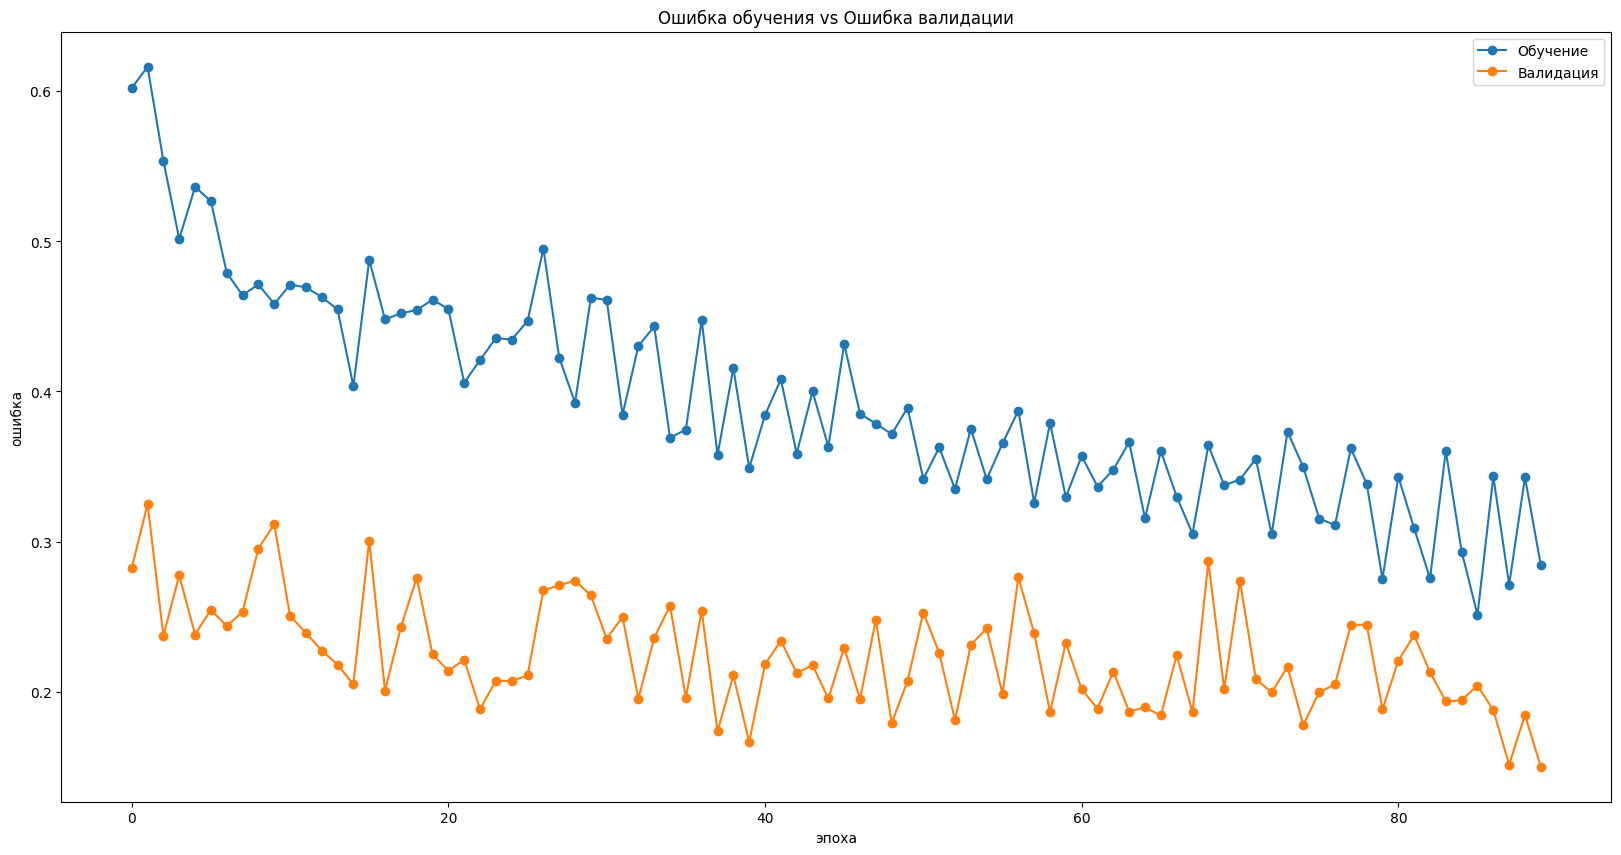

In [141]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(train_losses,'-o')
plt.plot(val_losses,'-o')
plt.xlabel('эпоха')
plt.ylabel('ошибка')
plt.legend(['Обучение','Валидация'])
plt.title('Ошибка обучения vs Ошибка валидации')
plt.show()

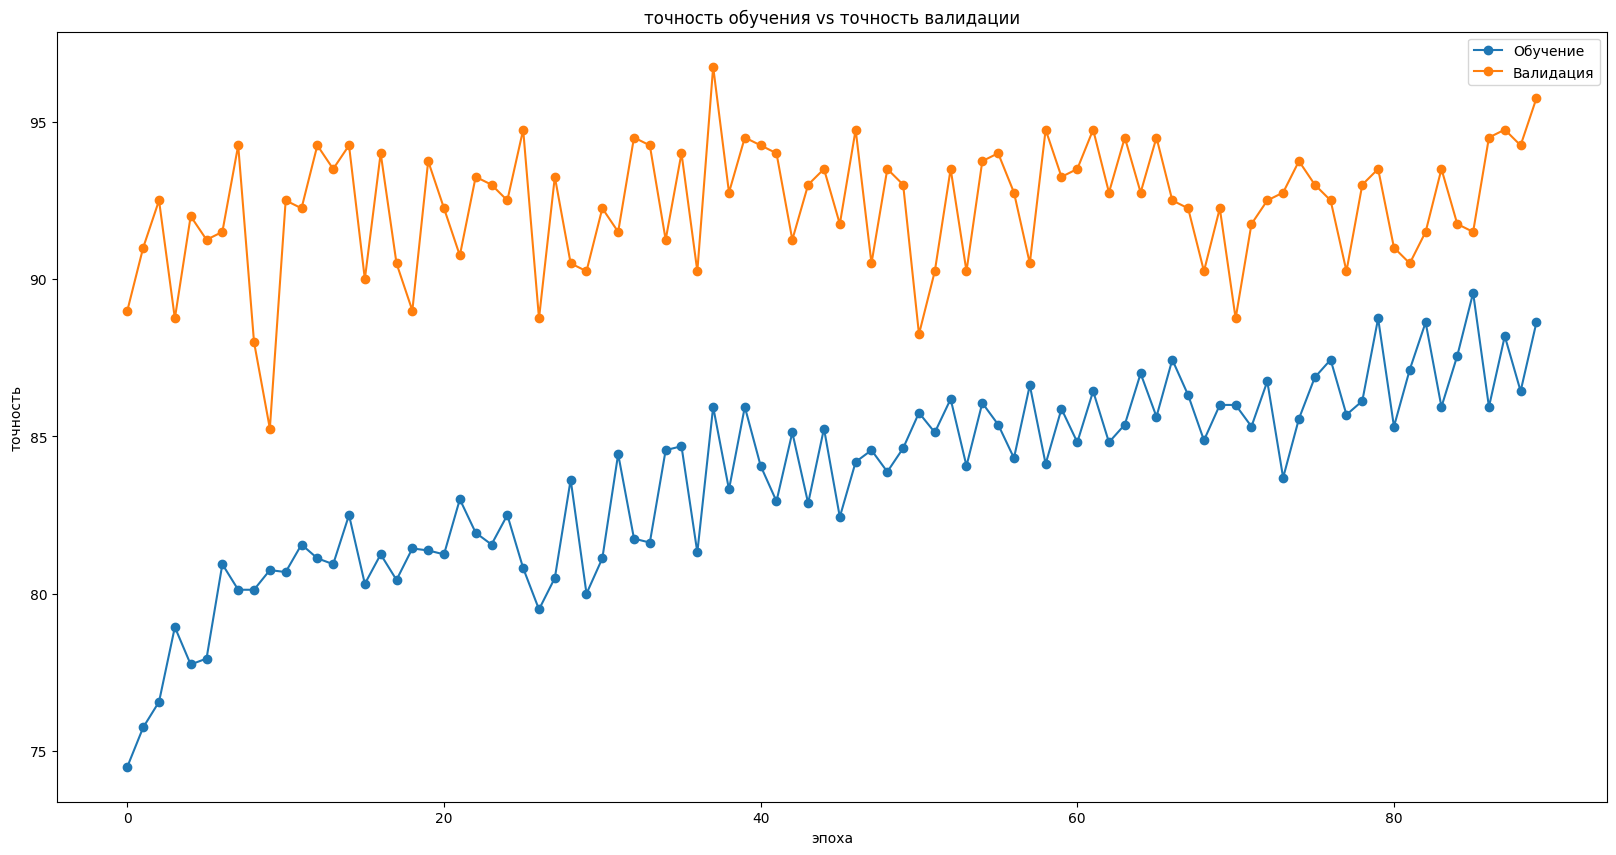

In [142]:
train_acc = [x.to('cpu').numpy() for x in train_acc]
train_acc=np.array(train_acc)
val_acc = [x.to('cpu').numpy() for x in val_acc]
val_acc=np.array(val_acc)
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(train_acc,'-o')
plt.plot(val_acc,'-o')
plt.xlabel('эпоха')
plt.ylabel('точность')
plt.legend(['Обучение','Валидация'])
plt.title('точность обучения vs точность валидации')
plt.show()

In [143]:
preds=[]
trgts=[]
with torch.no_grad():
  for data in tqdm(val_loader):
    inputs, targets=data[0].to(device),data[1].to(device)
    outputs=model(inputs)
    targets=targets.to('cpu').numpy()
    pred = outputs.data.max(1, keepdim=True)[1]
    pred = pred.to('cpu').numpy()
    trgts.append(targets)
    preds.append(pred)

100%|██████████| 25/25 [00:00<00:00, 864.95it/s]


In [144]:
targets=[x for sub in trgts for x in sub]
predictions=[x[0] for sub in preds for x in sub]

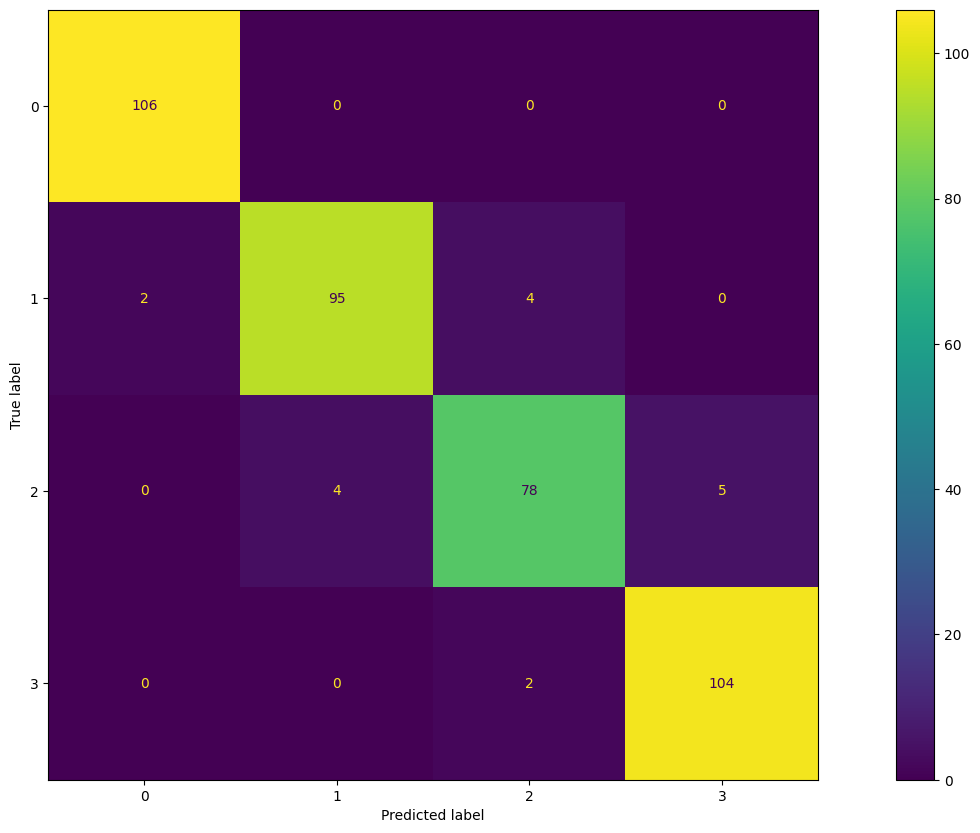

In [145]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report
cm = confusion_matrix(targets, predictions)
ConfusionMatrixDisplay(cm).plot()

In [146]:
print(classification_report(targets, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       106
           1       0.96      0.94      0.95       101
           2       0.93      0.90      0.91        87
           3       0.95      0.98      0.97       106

    accuracy                           0.96       400
   macro avg       0.96      0.95      0.96       400
weighted avg       0.96      0.96      0.96       400

